<h1>Check1<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PyMC3-for-Bayesian-Inference" data-toc-modified-id="PyMC3-for-Bayesian-Inference-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PyMC3 for Bayesian Inference</a></span><ul class="toc-item"><li><span><a href="#Model-with-500-Observations" data-toc-modified-id="Model-with-500-Observations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model with 500 Observations</a></span><ul class="toc-item"><li><span><a href="#Checking-for-new-module" data-toc-modified-id="Checking-for-new-module-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Checking for new module</a></span></li></ul></li></ul></li></ul></div>

Table of Content for all the cells

In [525]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [575]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')
display(train.head(),test.head(),sample.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Bayesian Linear Regression

## PyMC3 for Bayesian Inference

Implement MCMC to find the posterior distribution of the model parameters. Rather than a single point estimate of the model weights, Bayesian linear regression will give us a posterior distribution for the model weights.

### Model with 500 Observations

In [529]:
#For Variable Importance
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
## This line instantiates the model. 
rf = RandomForestClassifier() 
train=train.dropna(axis = 1, how = 'any')

#### Checking for new module


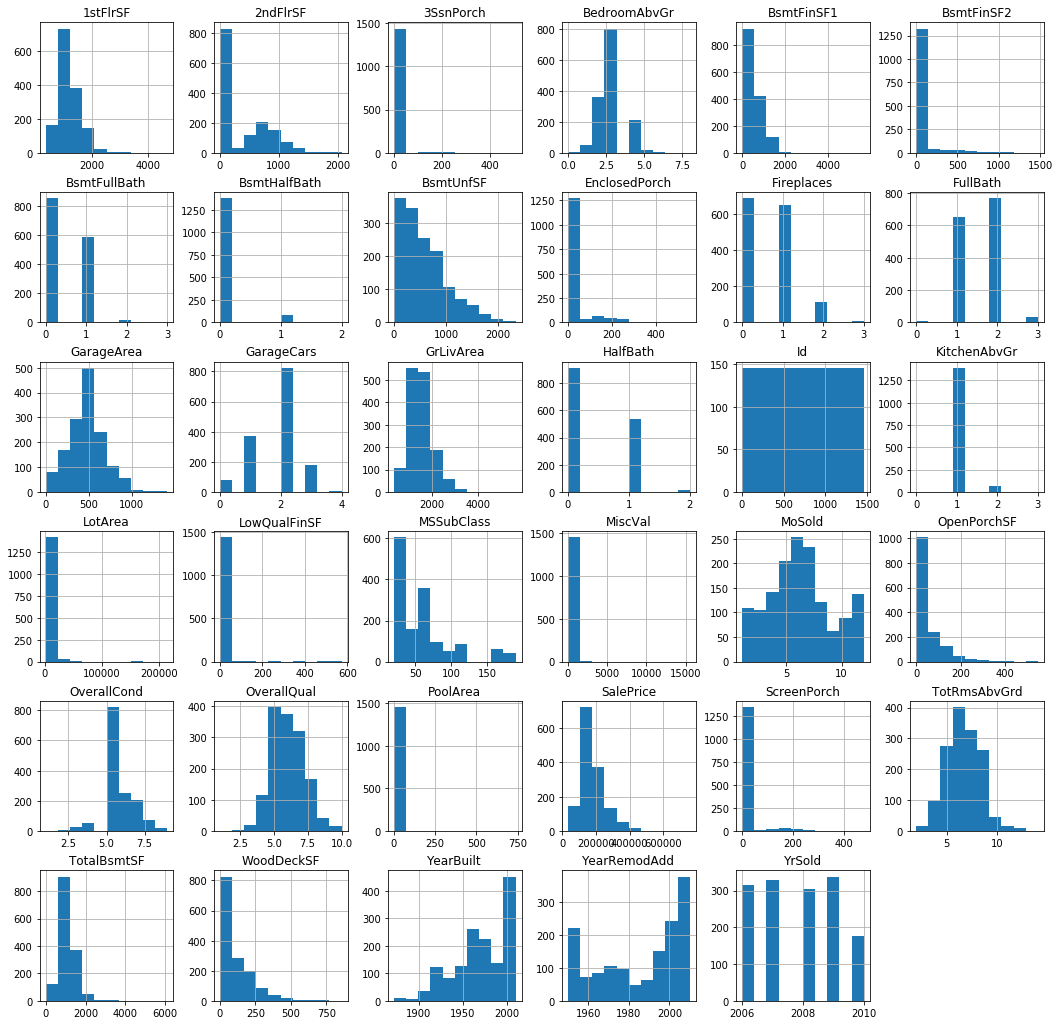

In [530]:
train.hist(figsize = (18,18))
plt.show()

In [531]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [532]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [533]:
from sklearn.model_selection import train_test_split
train=train.dropna()
X=train.iloc[:,2:60]
y=train.iloc[:,61]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)

In [534]:
X_train.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,10299.347032,6.090411,5.576256,1970.616438,1984.880365,440.130594,47.357078,566.645662,1054.133333,1162.907763,...,466.600913,96.925114,45.324201,21.263927,2.958904,14.837443,3.152511,32.670320,6.336986,2007.856621
std,9580.447451,1.406452,1.134220,30.564956,20.705061,467.089391,166.252917,441.726942,450.361330,396.639955,...,212.003882,128.620809,66.105242,60.436051,27.167016,56.041975,43.008391,300.416481,2.702942,1.332511
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,7500.000000,5.000000,5.000000,1952.000000,1967.000000,0.000000,0.000000,220.500000,783.000000,874.000000,...,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,9364.000000,6.000000,5.000000,1972.000000,1994.000000,368.000000,0.000000,483.000000,991.000000,1086.000000,...,477.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,11539.500000,7.000000,6.000000,2000.000000,2004.000000,707.000000,0.000000,800.000000,1302.000000,1391.000000,...,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


In [535]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [536]:
X_train=X_train.select_dtypes(include='int64')
X_test=X_test.select_dtypes(include='int64')

In [537]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1446 to 1389
Data columns (total 32 columns):
LotArea          1095 non-null int64
OverallQual      1095 non-null int64
OverallCond      1095 non-null int64
YearBuilt        1095 non-null int64
YearRemodAdd     1095 non-null int64
BsmtFinSF1       1095 non-null int64
BsmtFinSF2       1095 non-null int64
BsmtUnfSF        1095 non-null int64
TotalBsmtSF      1095 non-null int64
1stFlrSF         1095 non-null int64
2ndFlrSF         1095 non-null int64
LowQualFinSF     1095 non-null int64
GrLivArea        1095 non-null int64
BsmtFullBath     1095 non-null int64
BsmtHalfBath     1095 non-null int64
FullBath         1095 non-null int64
HalfBath         1095 non-null int64
BedroomAbvGr     1095 non-null int64
KitchenAbvGr     1095 non-null int64
TotRmsAbvGrd     1095 non-null int64
Fireplaces       1095 non-null int64
GarageCars       1095 non-null int64
GarageArea       1095 non-null int64
WoodDeckSF       1095 non-null int64
Op

In [538]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=883, verbose=0, warm_start=False)

In [539]:
from sklearn.metrics import mean_squared_log_error
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_log_error( y_test,rf_pred ))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  0.13956924741444446


In [540]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
1,OverallQual,0.570389
12,GrLivArea,0.104271
8,TotalBsmtSF,0.049534
10,2ndFlrSF,0.046560
5,BsmtFinSF1,0.034731


In [541]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", learning_rate=0.12,random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.12, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [542]:
rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)

0.12597183621883862


In [543]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbmodel= GradientBoostingRegressor(n_estimators=300, learning_rate=0.1,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=100, 
                                   loss='huber', random_state =5)
gbmodel.fit(X_train,y_train)
y_pred = gbmodel.predict(X_test)

rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)

0.12453487846249421


In [544]:
#For Hyperparameters optimisation
#Randomised Hyperparameter Search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [545]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = 10)
rf_random 

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=10,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [546]:
#For Hyperparameter tuning
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.4s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   1.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=300, 

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.7s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [547]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [548]:
rf = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
from sklearn.metrics import mean_squared_log_error
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_log_error( y_test,rf_pred ))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  0.138479268554438


In [549]:
#Treatment of Categorical variables: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [550]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [551]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [552]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [553]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


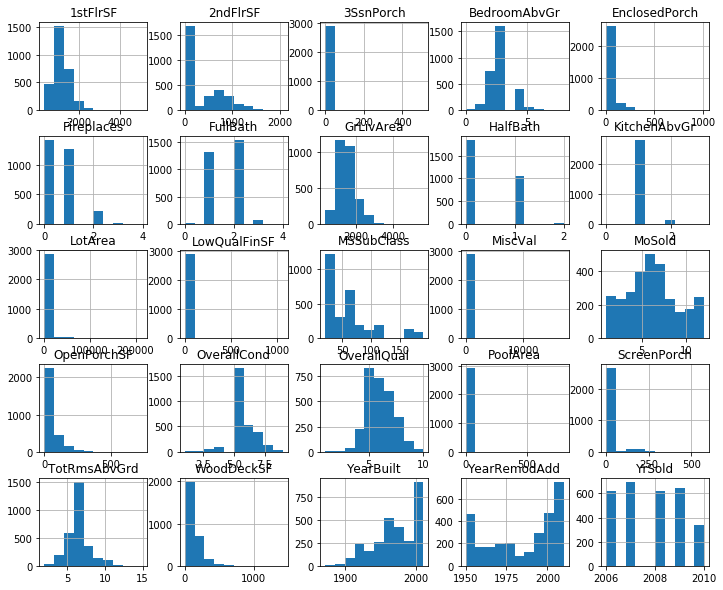

In [554]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

In [555]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [556]:
combined.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,0,0,1,0,0,0,0,1,0


In [557]:
combined.shape

(2919, 149)

In [558]:
train.shape

(1460, 62)

In [559]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [560]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.1, random_state = 14)
rf = RandomForestRegressor(n_estimators = 200, random_state = 883,n_jobs=-1,oob_score=True)
rf.fit(X_train,y_train)

# Get the mean absolute error on the validation data
from sklearn.metrics import mean_squared_log_error

rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_log_error( y_test,rf_pred ))
print("RMSE for Random Forest is ",rf_rmse)

# Get the mean absolute error on the validation data
# predicted_prices = model.predict(val_X)
# MAE = mean_absolute_error(val_y , predicted_prices)
# print('Random forest validation MAE = ', MAE)
predicted_prices = rf.predict(test)

RMSE for Random Forest is  0.11774795032780984


In [561]:
pd.DataFrame(predicted_prices).to_csv('trial_1.csv')

In [562]:

rf = RandomForestRegressor(n_estimators = 200, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)

# Get the mean absolute error on the validation data
from sklearn.metrics import mean_squared_log_error
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_log_error( y_test,rf_pred ))
print("RMSE for Random Forest is ",rf_rmse)


RMSE for Random Forest is  0.11774795032780984


In [563]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
a2=fi[fi['importance']>0.001].feature.values.tolist()
a2

['OverallQual',
 'GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'OpenPorchSF',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'Fireplaces',
 'MoSold',
 'OverallCond',
 'FullBath',
 'MSSubClass',
 'YrSold',
 'ExterQual_Ex',
 'BedroomAbvGr',
 'ScreenPorch',
 'CentralAir_Y',
 'LotShape_Reg',
 'SaleCondition_Partial',
 'CentralAir_N',
 'LandContour_Bnk',
 'HalfBath',
 'ExterQual_TA',
 'LandSlope_Gtl',
 'LotConfig_Corner',
 'RoofStyle_Hip',
 'Neighborhood_Edwards',
 'ExterQual_Gd',
 'SaleCondition_Normal',
 'HouseStyle_2Story',
 'Neighborhood_Crawfor',
 'LandContour_Lvl']

In [564]:
#combined=combined[a2]
#combined.shape

In [565]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbmodel= GradientBoostingRegressor(n_estimators=1200, 
                                      learning_rate=0.05,
                                      max_depth=4, 
                                      max_features='sqrt',
                                      min_samples_leaf=15, 
                                      min_samples_split=10, 
                                      loss='huber',
                                      random_state=5)
gbmodel.fit(X_train,y_train)
y_pred = gbmodel.predict(X_test)

rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)
predicted_prices = gbmodel.predict(test)
b=pd.DataFrame(predicted_prices).reset_index()
#Best So far

0.10749437857648757


In [566]:
#XGBoost
import xgboost as xgb
model=xgb.XGBRegressor(colsample_bytree=0.2,
                             learning_rate=0.06,
                             max_depth=3,
                             n_estimators=1150,loss='huber')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)
predicted_prices = model.predict(test)
a=pd.DataFrame(predicted_prices).reset_index()


0.1095111856633734


In [567]:
a.columns=['ind','value']
b.columns=['ind','value']
c=pd.merge(a,b,on='ind')
c['final']=(c['value_x']+c['value_y'])/2
c.to_csv('stacked.csv')
#Best till now, Stacked Output

In [568]:
rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)


0.1095111856633734


In [569]:
predictions = cross_val_predict(model, X_train,y_train, cv=5)

In [570]:
y_pred = model.predict(X_test)
rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)


0.1095111856633734


In [571]:
my_model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.05)
my_model.fit(X_train,y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_pred = my_model.predict(X_test)

rf_rmse=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rf_rmse)


0.1281910852114889


In [572]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [573]:
svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

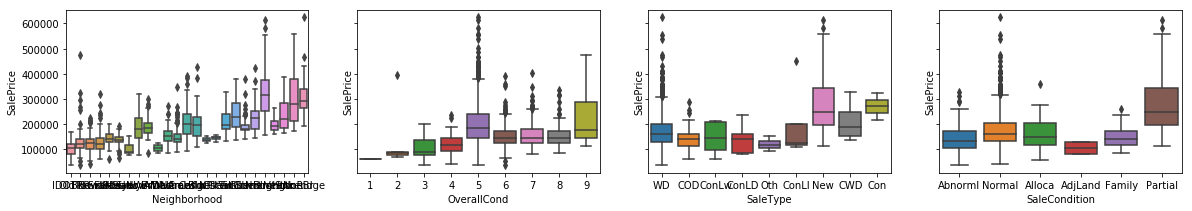

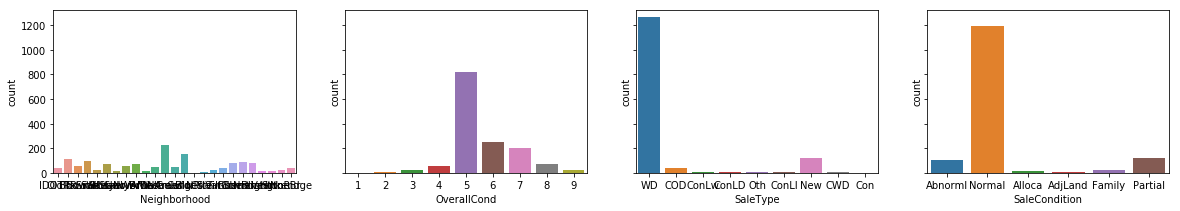

In [594]:
import seaborn as sns
cols = ['Neighborhood','OverallCond','SaleType','SaleCondition']
sorted_data = train.sort_values(by='SalePrice')

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4 * 5, 3), sharey=True)
for i, c in zip(np.arange(len(axes)), cols):
    sns.boxplot(x=c, y='SalePrice', data=sorted_data, ax=axes[i])

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4 * 5, 3), sharey=True)
for i, c in zip(np.arange(len(axes)), cols):
    sns.countplot(x=c, data=sorted_data, ax=axes[i])


(1460, 81)
(1452, 81)


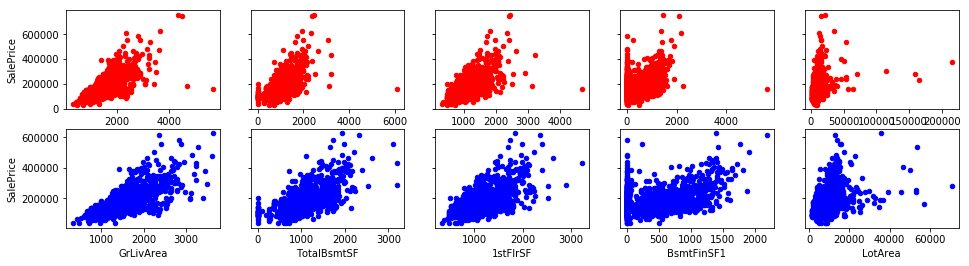

In [588]:
#For Continuous variables
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

# delete outliers
print(train.shape)
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
print(train.shape)

for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

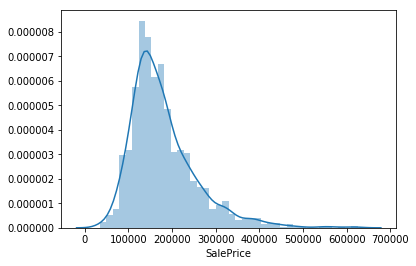

In [597]:
#First stage in a feature
sns.distplot(train['SalePrice']);

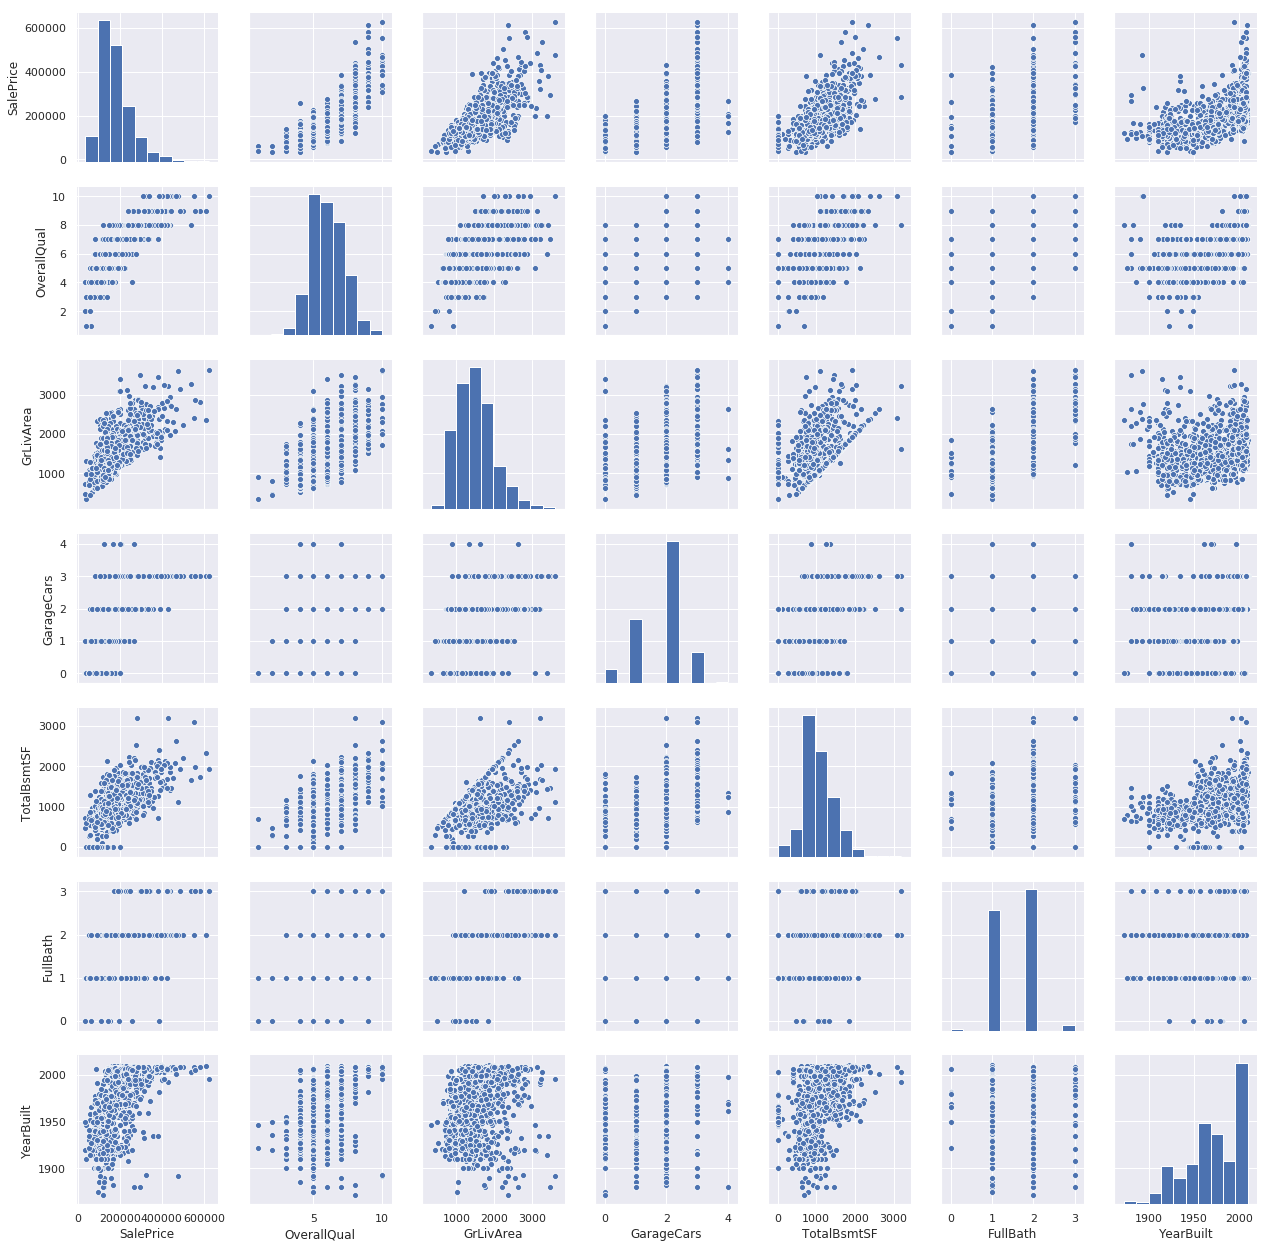

In [601]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();